In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score, accuracy_score


In [6]:
rows = 10000   # reduced to avoid memory issues

df = pd.DataFrame({
    "age": np.random.randint(22, 60, rows),
    "monthly_income": np.random.randint(20000, 120000, rows),
    "family_size": np.random.randint(1, 6, rows),
    "house_rent": np.random.randint(5000, 35000, rows),
    "loan_emi": np.random.randint(0, 25000, rows)
})


df["monthly_expense"] = (
    df["monthly_income"] * 0.5 +
    df["house_rent"] * 0.7 +
    df["loan_emi"] * 0.8 +
    df["family_size"] * 2500
)

df.head()


,age,monthly_income,family_size,house_rent,loan_emi,monthly_expense
0,54,106623,4,14506,7491,79458.5
1,29,66265,2,33846,18362,76514.3
2,45,117884,5,26701,10145,98248.7
3,27,93608,3,23218,15637,83066.2
4,38,42625,3,27737,18653,63150.8


In [7]:
df["high_expense"] = (df["monthly_expense"] > 70000).astype(int)

df[["monthly_expense", "high_expense"]].head()


,monthly_expense,high_expense
0,79458.5,1
1,76514.3,1
2,98248.7,1
3,83066.2,1
4,63150.8,0


In [8]:
print("Shape:", df.shape)
print("\nInfo:")
df.info()
print("\nDescribe:")
df.describe()
print("\nUnique values:")
df.nunique()


Shape: (10000, 7)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              10000 non-null  int64  
 1   monthly_income   10000 non-null  int64  
 2   family_size      10000 non-null  int64  
 3   house_rent       10000 non-null  int64  
 4   loan_emi         10000 non-null  int64  
 5   monthly_expense  10000 non-null  float64
 6   high_expense     10000 non-null  int64  
dtypes: float64(1), int64(6)
memory usage: 547.0 KB

Describe:

Unique values:


,0
age,38
monthly_income,9505
family_size,5
house_rent,8510
loan_emi,8270
monthly_expense,9947
high_expense,2


In [9]:

df.loc[df.sample(frac=0.05).index, "house_rent"] = np.nan


df.isnull().sum()


df["house_rent"] = df["house_rent"].fillna(df["house_rent"].mean())

df.isnull().sum()


,0
age,0
monthly_income,0
family_size,0
house_rent,0
loan_emi,0
monthly_expense,0
high_expense,0


In [10]:
print("Duplicates before:", df.duplicated().sum())

df = df.drop_duplicates()

print("Duplicates after:", df.duplicated().sum())


Duplicates before: 0
Duplicates after: 0


In [11]:
Q1 = df["monthly_expense"].quantile(0.25)
Q3 = df["monthly_expense"].quantile(0.75)
IQR = Q3 - Q1

df = df[
    (df["monthly_expense"] >= Q1 - 1.5 * IQR) &
    (df["monthly_expense"] <= Q3 + 1.5 * IQR)
]

df.shape


(10000, 7)

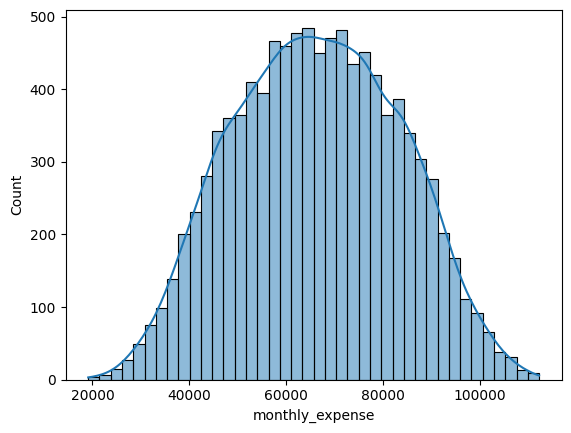

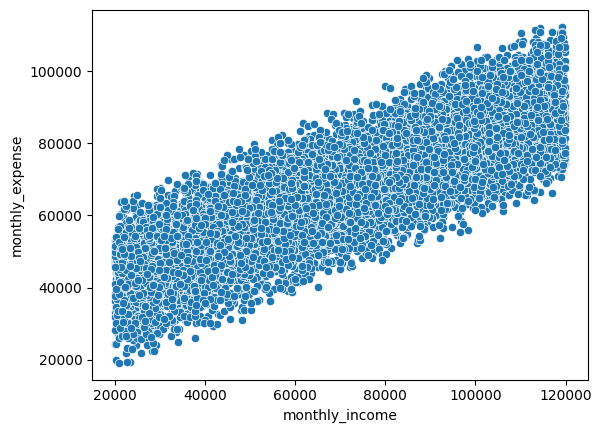

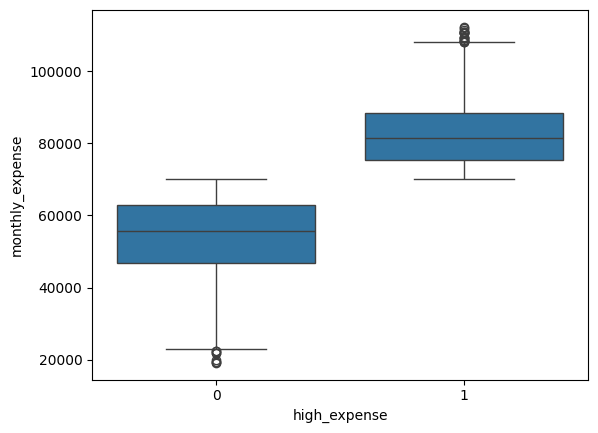

In [12]:
sns.histplot(df["monthly_expense"], kde=True)
plt.show()

sns.scatterplot(x="monthly_income", y="monthly_expense", data=df)
plt.show()

sns.boxplot(x="high_expense", y="monthly_expense", data=df)
plt.show()


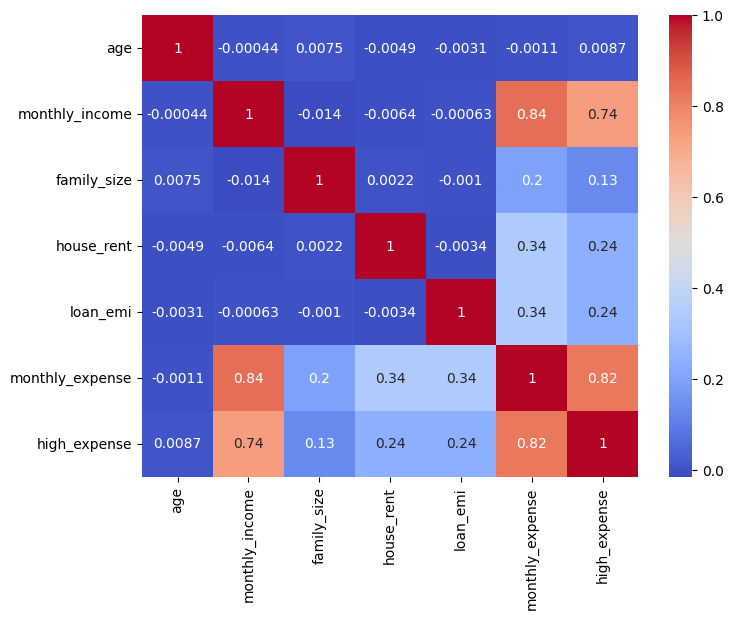

In [13]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()


In [14]:
X = df.drop(["monthly_expense", "high_expense"], axis=1)
y_reg = df["monthly_expense"]
y_clf = df["high_expense"]


In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_reg, test_size=0.2
)

Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    X_scaled, y_clf, test_size=0.2
)


In [17]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)


In [18]:
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)


R2 Score: 0.9929261848114694


In [24]:
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

R2 Score: 0.9937620046693502


In [22]:
lr = LinearRegression()
lr.fit(X_test, y_test)

y_pred = lr.predict(X_test)


R2 Score: 0.9937257954065216
Mean Squared Error: 1853826.1254152218
RMSE: 1361.552836071822


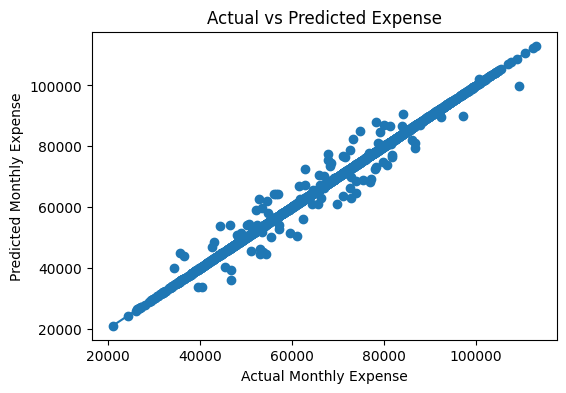

In [20]:
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()]
)
plt.xlabel("Actual Monthly Expense")
plt.ylabel("Predicted Monthly Expense")
plt.title("Actual vs Predicted Expense")
plt.show()
